In [28]:
import pandas as pd
import plotly.express as px

In [6]:
df_weight = (pd.read_csv('../data/weight.csv.gz')
               .rename(columns={'Unnamed: 0': 'timestamp'}))

df_dist = (pd.read_csv('../data/semantic-history-summary.csv.gz')
               .rename(columns={'Unnamed: 0': 'timestamp'}))

In [13]:
df = (pd.concat([df_weight, df_dist])
        .assign(timestamp=lambda df: pd.to_datetime(df.timestamp))
      
      .set_index('timestamp'))

In [71]:
r_df = df.resample('1m')
weight = r_df.weight_in_kg.mean()
distance = r_df.distance_in_km.sum()
duration = r_df.duration_in_hr.sum()


agg_df = (pd.concat([weight, distance, duration], axis=1)
            .reset_index()
            .set_index('timestamp')
            .interpolate('time') 
            .reset_index()
         )

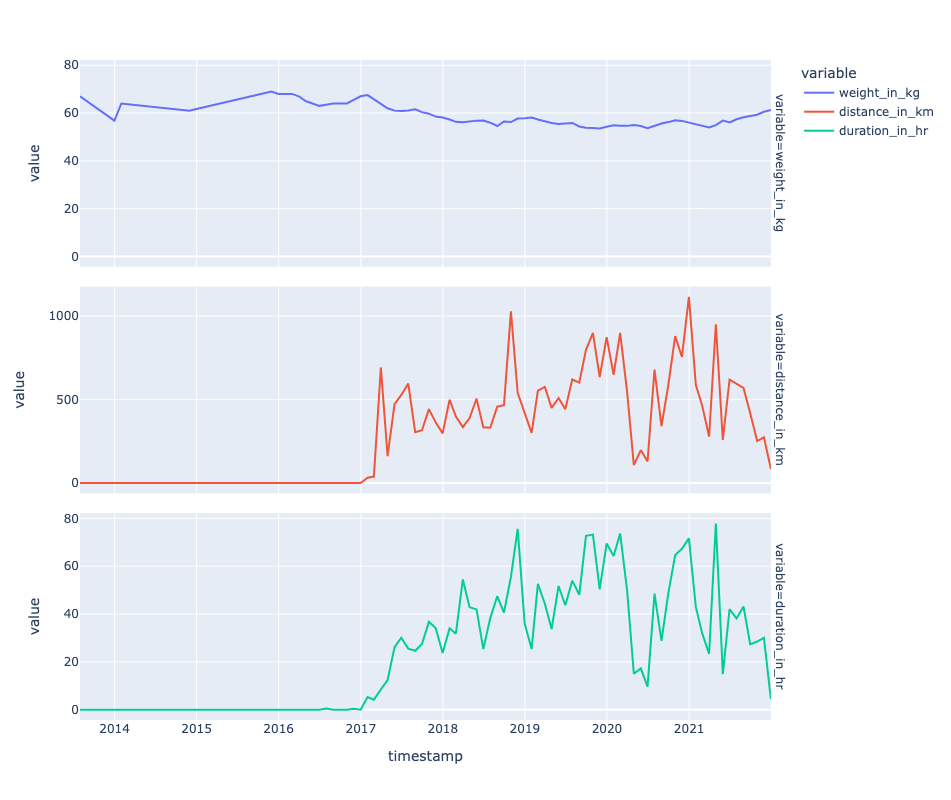

In [72]:
fig_df = agg_df.melt(id_vars={'timestamp'})

fig = px.line(fig_df, 
              x='timestamp', 
              y='value', 
              facet_row='variable',
              color='variable',
              width=800,
              height=800)
fig.layout.yaxis2.update(matches=None)
fig.show()

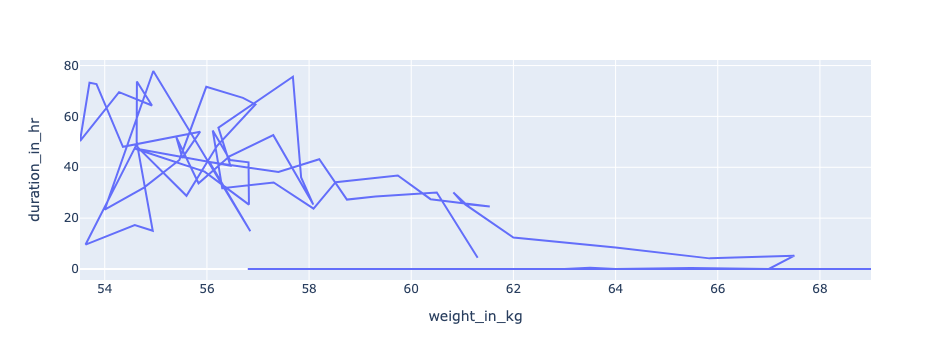

In [79]:
px.line(agg_df,
        x='weight_in_kg',
        y='duration_in_hr')

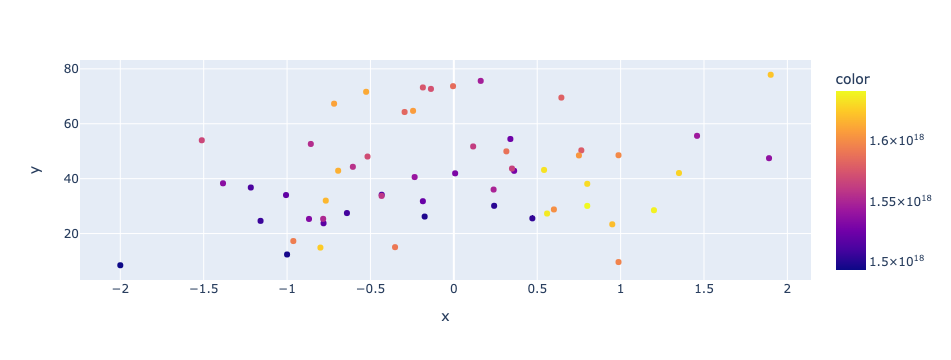

In [132]:
z = agg_df.query('timestamp > "2017-03-01"')
i = 1

px.scatter(x=z.weight_in_kg.diff()[i:],
           y=z.duration_in_hr[:-i],
           color=z.timestamp[i:].view(int))

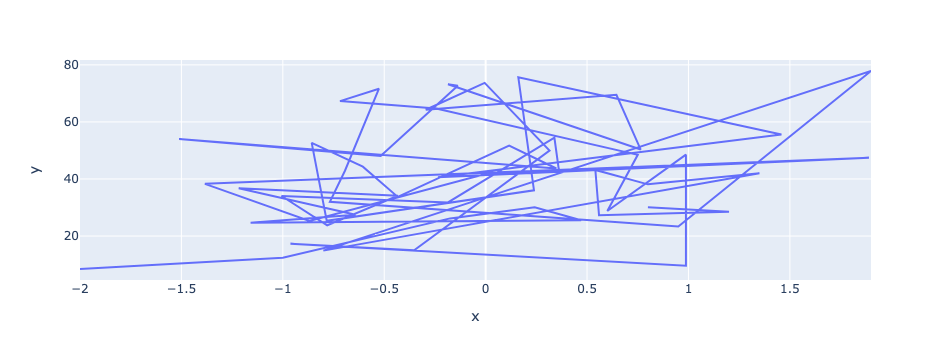

In [135]:
z = agg_df.query('timestamp > "2017-03-01"')
i = 1

px.line(x=z.weight_in_kg.diff()[i:],
           y=z.duration_in_hr[:-i])